# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing  import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape   #checking te data dimensiion

(614, 13)

In [4]:
df.dtypes   #checking the data types of each column

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [7]:
#checking the null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [9]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [10]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [11]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [13]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [14]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [15]:
#checking the null values in the dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

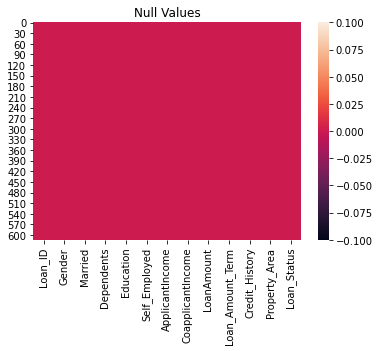

In [16]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

- As we can see that their is no null values present in the dataset

### Visualization of the data

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

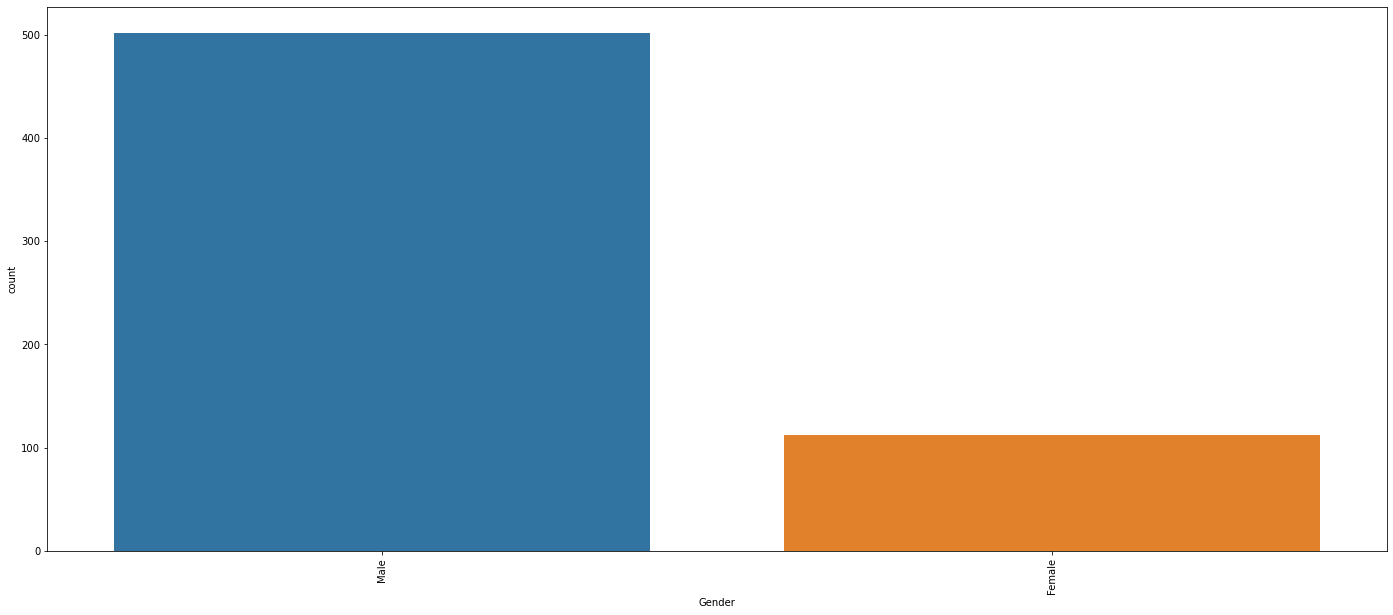

In [17]:
plt.figure(figsize=(24,10))
sns.countplot(df['Gender']) 
plt.xticks(rotation=90)

- As We  can see from the above graph that majority of the people that applied for loan are Male.

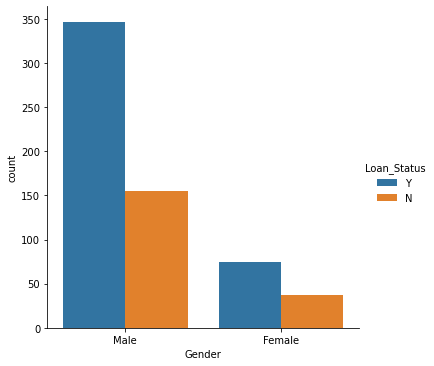

In [18]:
sns.catplot(x ="Gender", hue ="Loan_Status",  kind ="count", data = df) 

- We can see that majority of the loans are passed whether they are applied by male or female.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

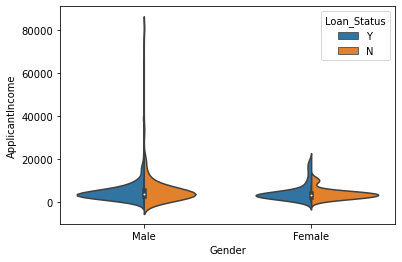

In [19]:
sns.violinplot(x ="Gender", y ="ApplicantIncome", hue ="Loan_Status",  data = df, split = True) 

- We can see that in the similar income range more loan application is passed for men as compare to women.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

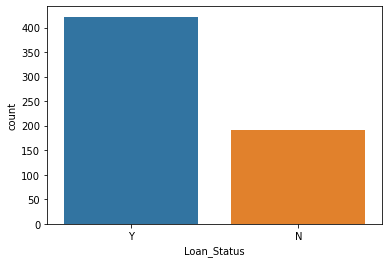

In [20]:
sns.countplot(x='Loan_Status', data=df)

- As we can see that more loan applications are passed as compare to the loan applications that are not passed

<AxesSubplot:xlabel='Education', ylabel='count'>

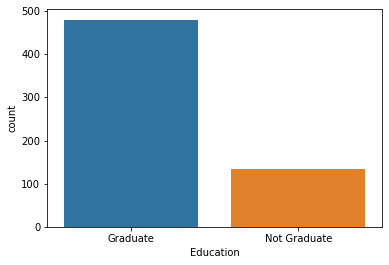

In [21]:
sns.countplot(x='Education', data=df)

- As we can see that more people are graduate then not graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

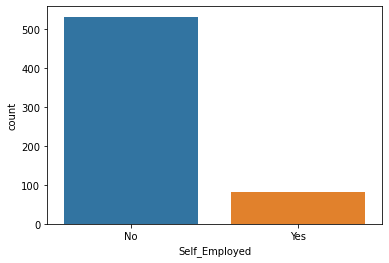

In [22]:
sns.countplot(x='Self_Employed', data=df)

- We can see that from the above graph that less number of people are self employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

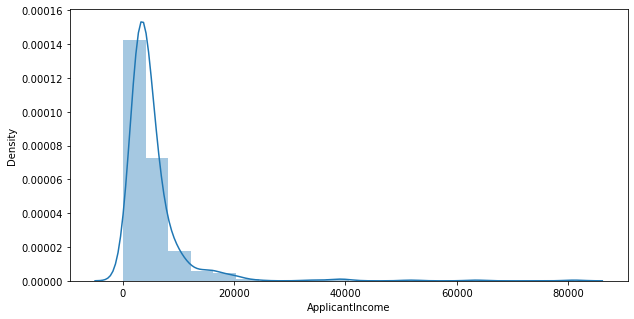

In [23]:
plt.figure(figsize=(10, 5))
sns.distplot(df['ApplicantIncome'], bins=20)

- As we can see that majority of the applicant have a income range from 0 to 20000.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

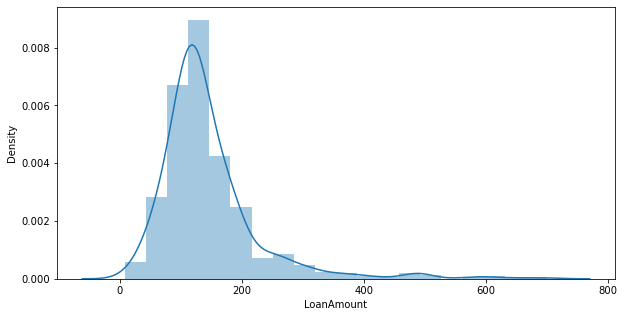

In [24]:
plt.figure(figsize=(10, 5))
sns.distplot(df['LoanAmount'], bins=20)

- we can see that majority of the people want a loan between range of 50 to 200.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

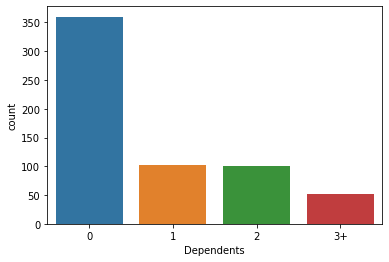

In [25]:
sns.countplot(x='Dependents', data=df)

- We can observe from the above graph that majority of the people didn't have any dependent person.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

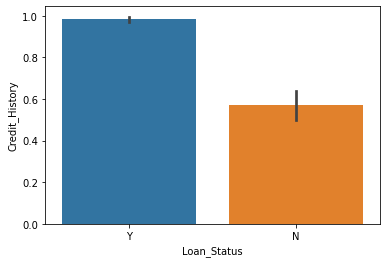

In [26]:
sns.barplot(x='Loan_Status', y='Credit_History', data=df)

- As we can observe from the above graph that majority of the loans are passed which have good credit history.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

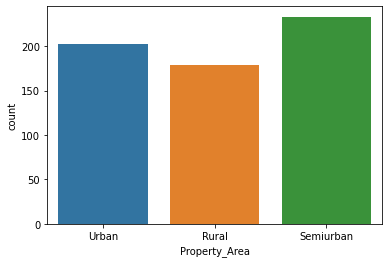

In [27]:
sns.countplot(x='Property_Area',  data=df)

- We can observe that all 3 area have almost same amount of loan application.

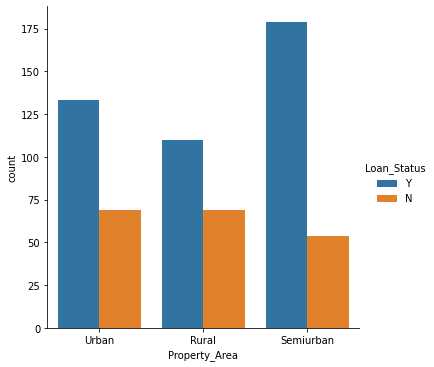

In [28]:
sns.catplot(x ="Property_Area", hue ="Loan_Status",  kind ="count", data = df) 

- We can observe that in all 3 areas more number of loans are passed as compare to loans that are not passed.

In [29]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


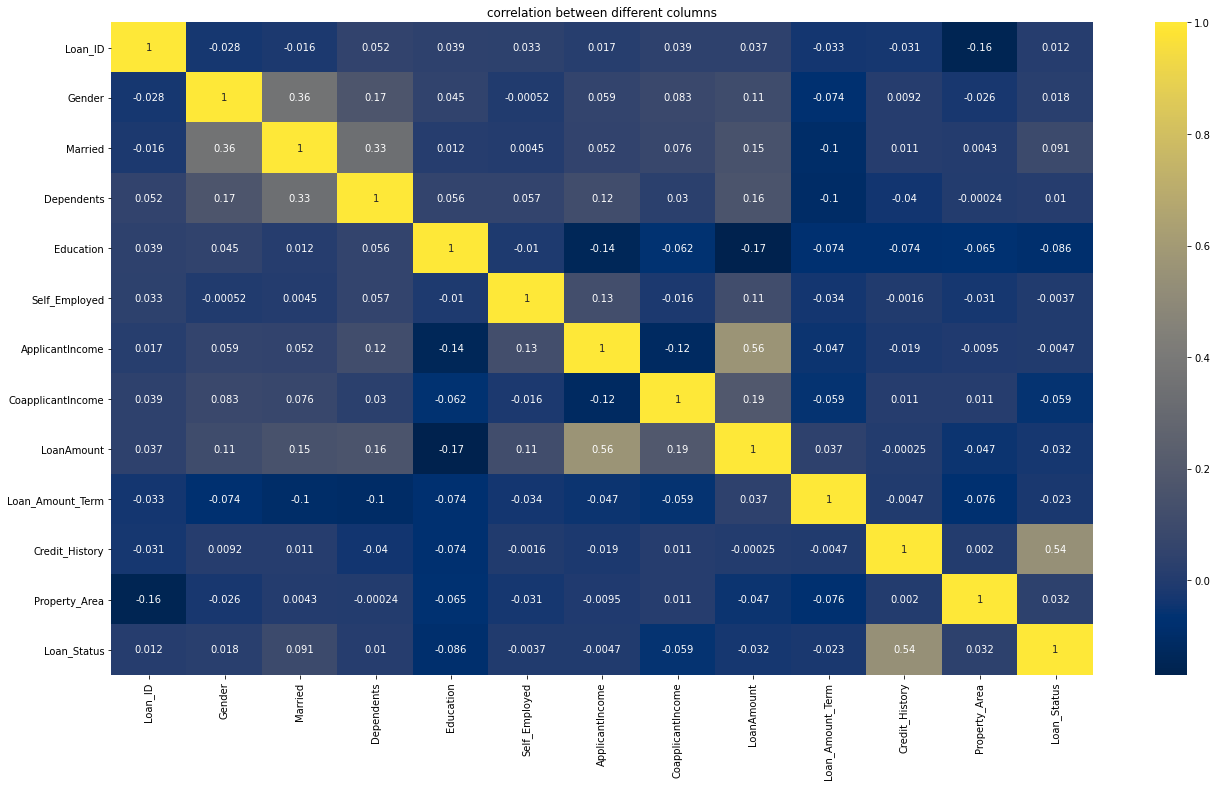

In [31]:
#checking which column is highly correlated to the target column i.e. 'Survived'
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

- We can observe from the above correlation map that Credit_history is the most correlated column to the loan_status.

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>],
       [<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

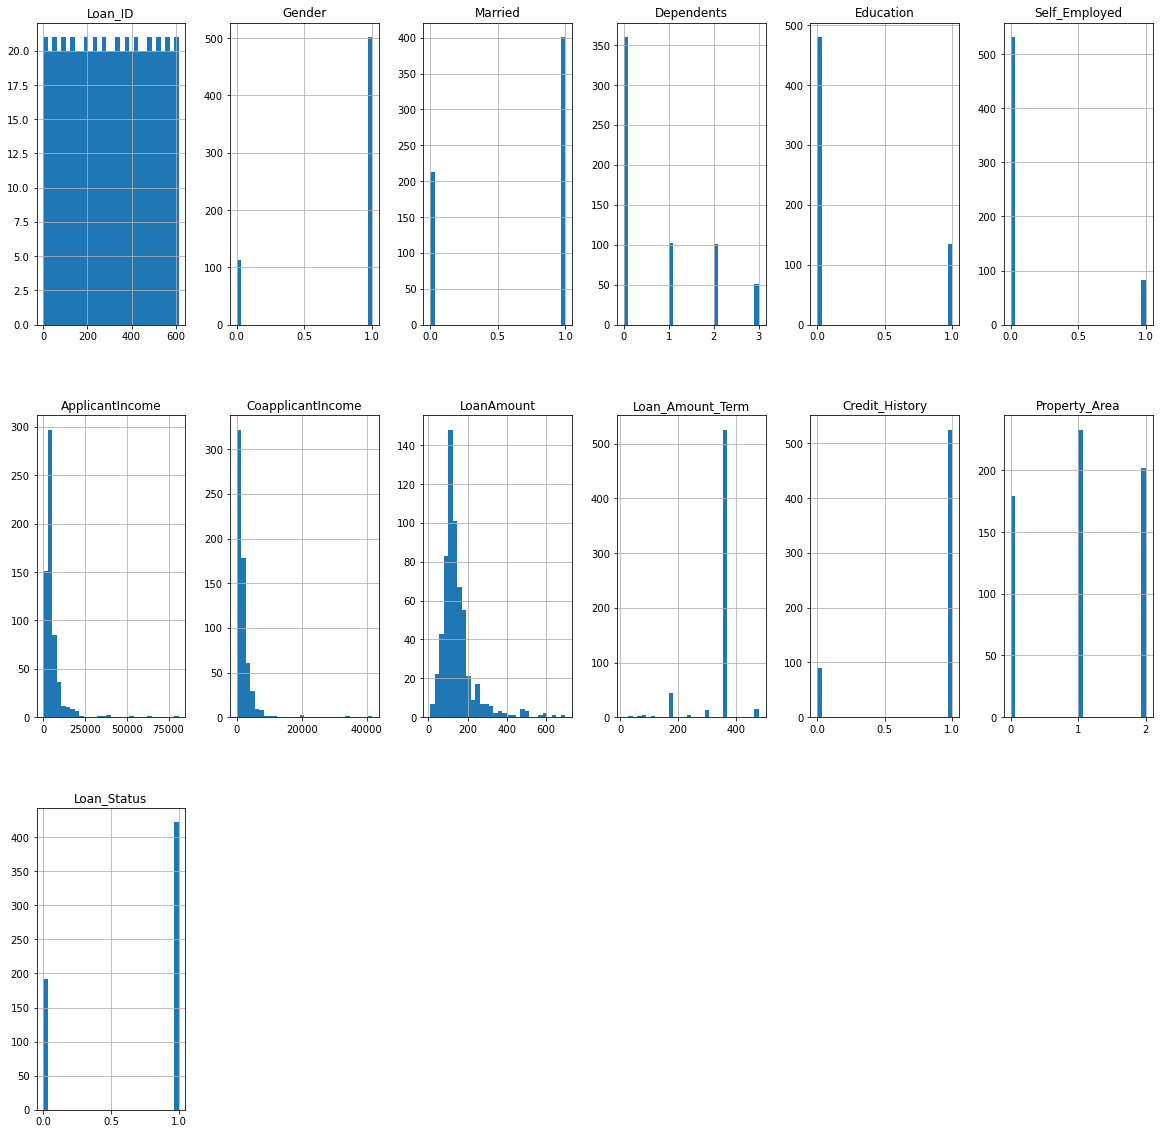

In [32]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

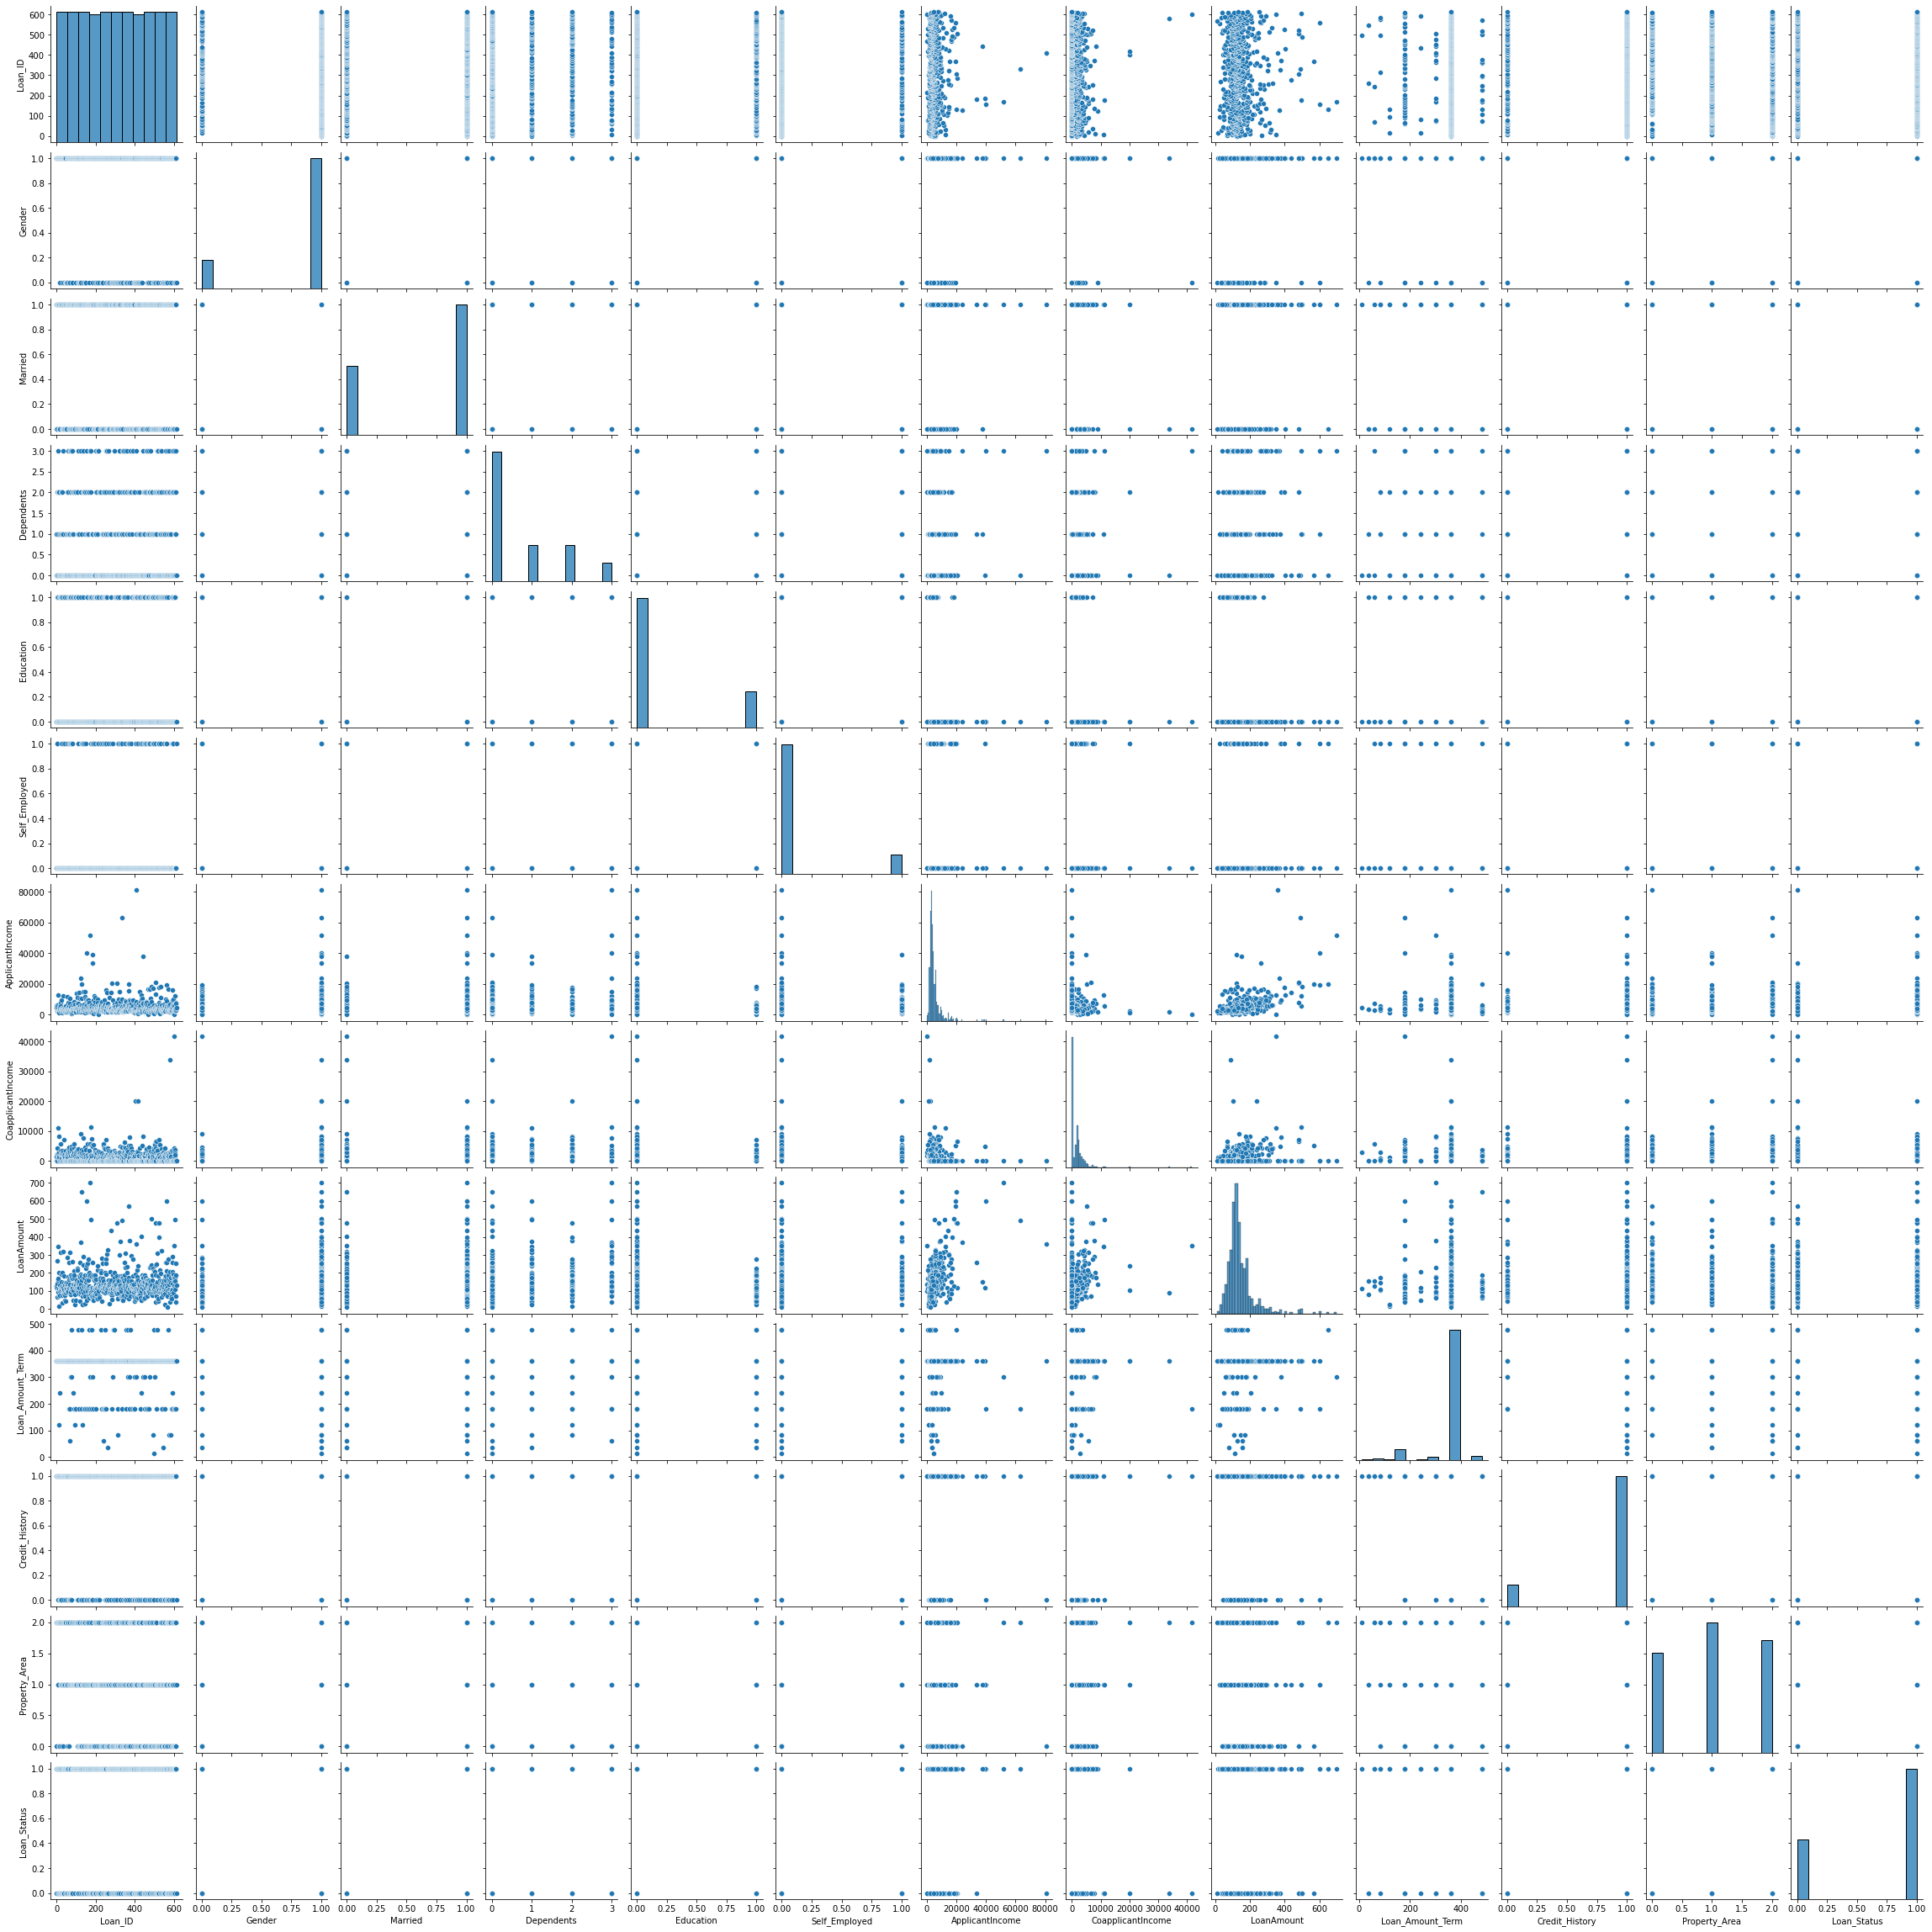

In [33]:
sns.pairplot(df)

In [34]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


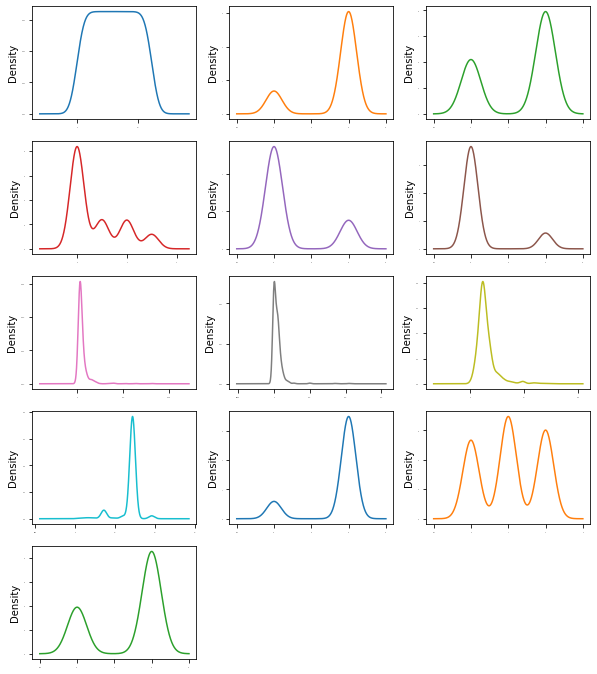

In [35]:
df.plot(kind='density',subplots=True,  layout=(5,3), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [36]:
#checking the skewness in the data
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [38]:
df=df.drop('Loan_ID', axis=1)

- We can drop loan id as it will not help us to predict whether the loan will going to be passed or not.

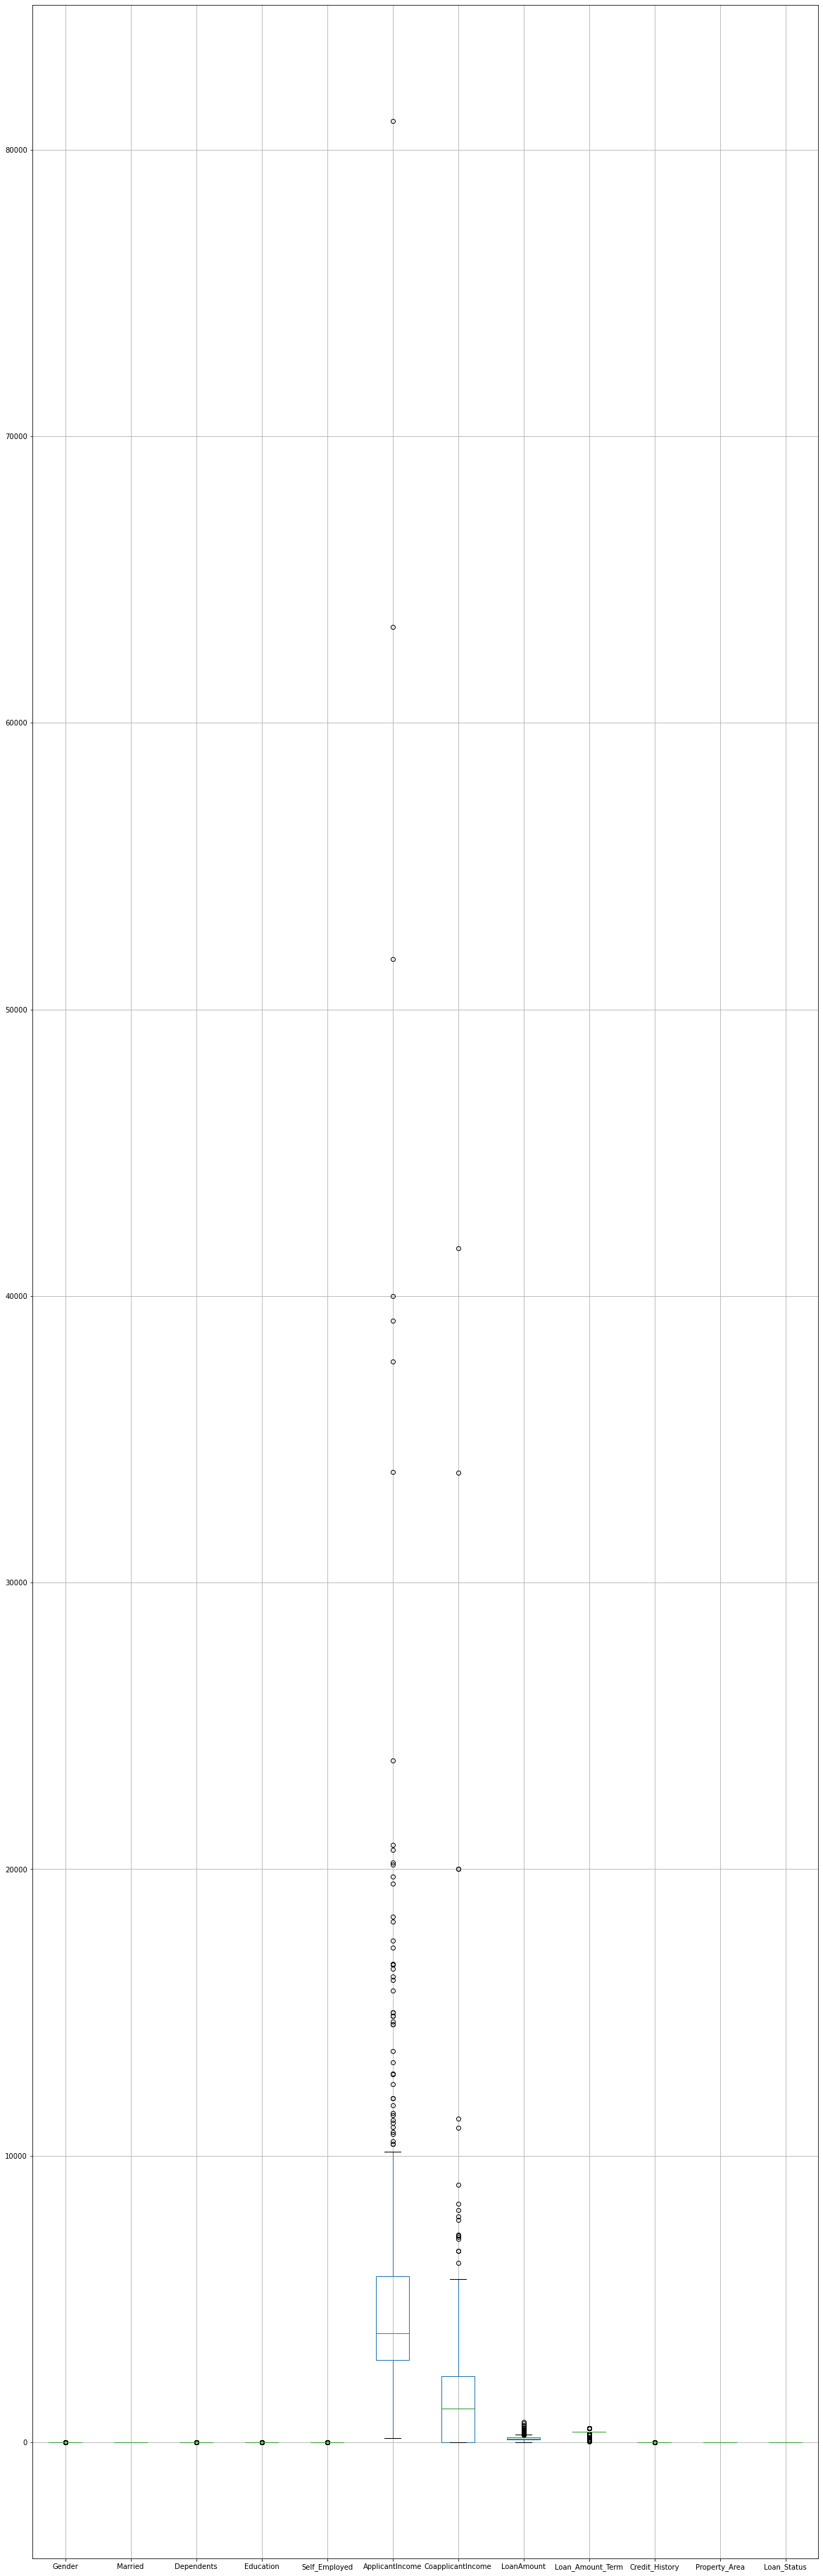

In [39]:
#checking the outliers
df.iloc[:,0:13].boxplot(figsize=[20,80])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [42]:

z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [43]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int32), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int32))


In [44]:
df_new=df[(z<3).all(axis=1)]  # removing outliers

In [45]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [46]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- As this is a categorical type of dataset we don't have to remove skewness from the dataset.

In [49]:
#splitting the dataset into independent and target variables in x and y respectively

x=df_new.drop('Loan_Status', axis=1)
y=df_new['Loan_Status']

In [50]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


In [51]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [52]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.8221258134490239
At random state 0, the testing accuracy is:- 0.7931034482758621


At random state 1, the training accuracy is:- 0.8112798264642083
At random state 1, the testing accuracy is:- 0.8275862068965517


At random state 2, the training accuracy is:- 0.8221258134490239
At random state 2, the testing accuracy is:- 0.8017241379310345


At random state 3, the training accuracy is:- 0.8221258134490239
At random state 3, the testing accuracy is:- 0.7931034482758621


At random state 4, the training accuracy is:- 0.824295010845987
At random state 4, the testing accuracy is:- 0.7931034482758621


At random state 5, the training accuracy is:- 0.824295010845987
At random state 5, the testing accuracy is:- 0.7931034482758621


At random state 6, the training accuracy is:- 0.8091106290672451
At random state 6, the testing accuracy is:- 0.8620689655172413


At random state 7, the training accuracy is:- 0.824295010845987
At random state 7, th

At random state 63, the training accuracy is:- 0.8177874186550976
At random state 63, the testing accuracy is:- 0.8189655172413793


At random state 64, the training accuracy is:- 0.8264642082429501
At random state 64, the testing accuracy is:- 0.7758620689655172


At random state 65, the training accuracy is:- 0.8264642082429501
At random state 65, the testing accuracy is:- 0.7672413793103449


At random state 66, the training accuracy is:- 0.8177874186550976
At random state 66, the testing accuracy is:- 0.8017241379310345


At random state 67, the training accuracy is:- 0.8329718004338394
At random state 67, the testing accuracy is:- 0.75


At random state 68, the training accuracy is:- 0.8004338394793926
At random state 68, the testing accuracy is:- 0.8620689655172413


At random state 69, the training accuracy is:- 0.8177874186550976
At random state 69, the testing accuracy is:- 0.8189655172413793


At random state 70, the training accuracy is:- 0.8373101952277657
At random state 7

- From the above stats, at random state 12 the testing accuracy and training accuracy is hightest.

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [55]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [56]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.896551724137931
[[17 10]
 [ 2 87]]
              precision    recall  f1-score   support

         0.0       0.89      0.63      0.74        27
         1.0       0.90      0.98      0.94        89

    accuracy                           0.90       116
   macro avg       0.90      0.80      0.84       116
weighted avg       0.90      0.90      0.89       116



accuracy score of SVC() is:
0.7672413793103449
[[ 0 27]
 [ 0 89]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        27
         1.0       0.77      1.00      0.87        89

    accuracy                           0.77       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.59      0.77      0.67       116



accuracy score of RandomForestClassifier() is:
0.8362068965517241
[[17 10]
 [ 9 80]]
              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64        27
  

- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [57]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.8146026986506746


In [58]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.8042278860569715


In [59]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.721079460269865


In [60]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.6897751124437781


In [61]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.7956071964017992


- As we can see the Minimum difference in accuracy score and cross validation score is for RandomForestClassifier(4) so this is our best model.

- Doing GridSearchCV for getting best parameters for RandomForestClassifier()

In [62]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': ['balanced', 'balanced_subsample'],}

In [63]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [65]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}

In [66]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [67]:
accuracy_score(GCV_pred,y_test)

0.8448275862068966

In [68]:
joblib.dump(GCV.best_estimator_,'Loan_Prediction.obj')

['Loan_Prediction.obj']

>Case Study:

- This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

>>Loan_ID

>>Gender

>>Married

>>Dependents

>>Education

>>Self_Employed

>>ApplicantIncome

>>CoapplicantIncome

>>Loan_Amount

>>Loan_Amount_Term

>>Credit History

>>Property_Area

>>Loan_Status

- We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.



>Findings:

- their is no null values present in the dataset.
-  majority of the people that applied for loan are Male.
- majority of the loans are passed whether they are applied by male or female.
- in the similar income range more loan application is passed for men as compare to women.
- more loan applications are passed as compare to the loan applications that are not passed.
- more people are graduate then not graduate.
- less number of people are self employed.
- majority of the applicant have a income range from 0 to 20000.
-  majority of the people want a loan between range of 50 to 200.
- majority of the people didn't have any dependent person.
- majority of the loans are passed which have good credit history.
- all 3 area have almost same amount of loan application.
- all 3 areas more number of loans are passed as compare to loans that are not passed.
-  Credit_history is the most correlated column to the loan_status.


>Predictions:

- at random state 12 the testing accuracy and training accuracy is hightest.
- The best accuracy_score is for RandomForest Classifier.
- the Minimum difference in accuracy score and cross validation score is for RandomForest Classifier so this is our best model.
- After doing Hyper parameter tuning, we are getting 84% model accuracy.